<a href="https://colab.research.google.com/github/emir1187/Tasks/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

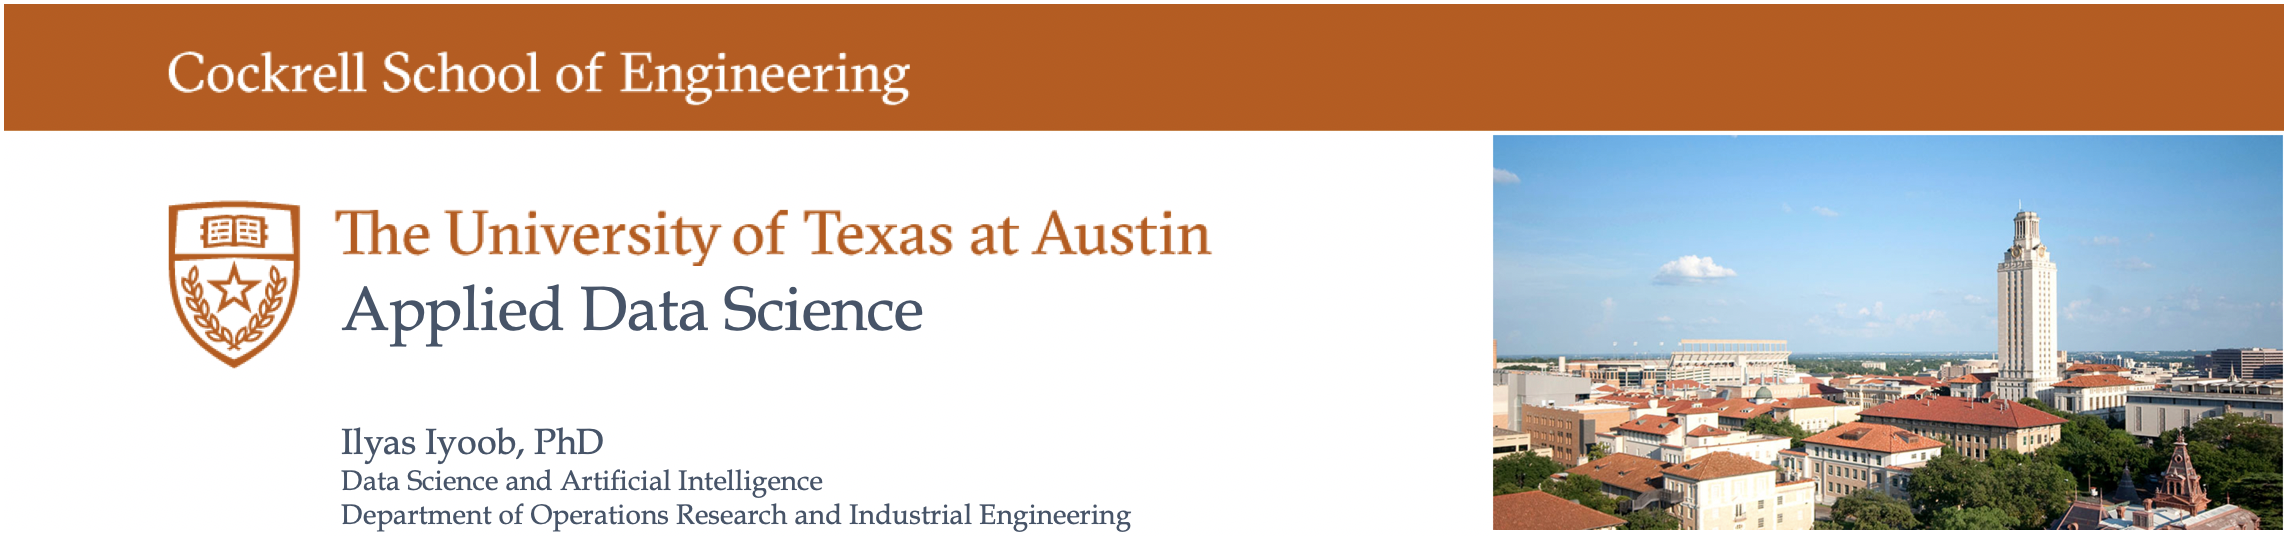

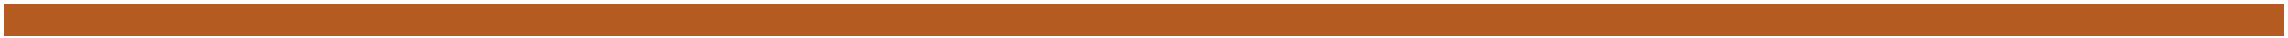

## <font color='#475468'> Digit Recognition:</font>
### <font color='#475468'> Can you predict digits from handwritten pictures?</font>

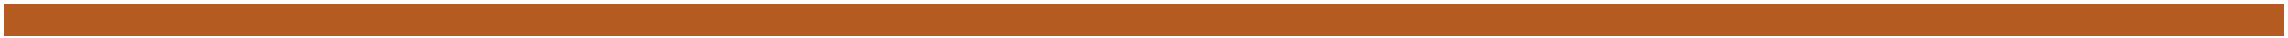

## Initialize

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dfDgt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/fashion/mnist_fashion_train.csv')
dfDgt.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dfDgt.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.500000,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,2.872305,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [7]:
# Define target and features

y = dfDgt['label'].ravel()
X = scale(dfDgt.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

Handwriting 				 Label
AxesImage(size=(28, 28)) 		 9


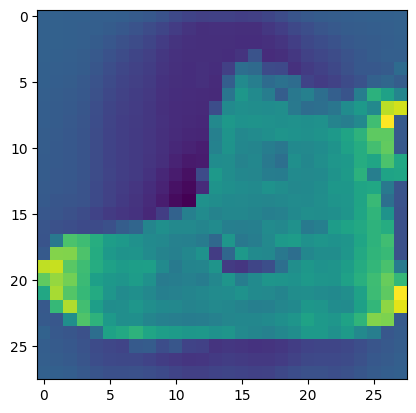

In [8]:
# Display first image
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

Let's print the first 30 images as well.

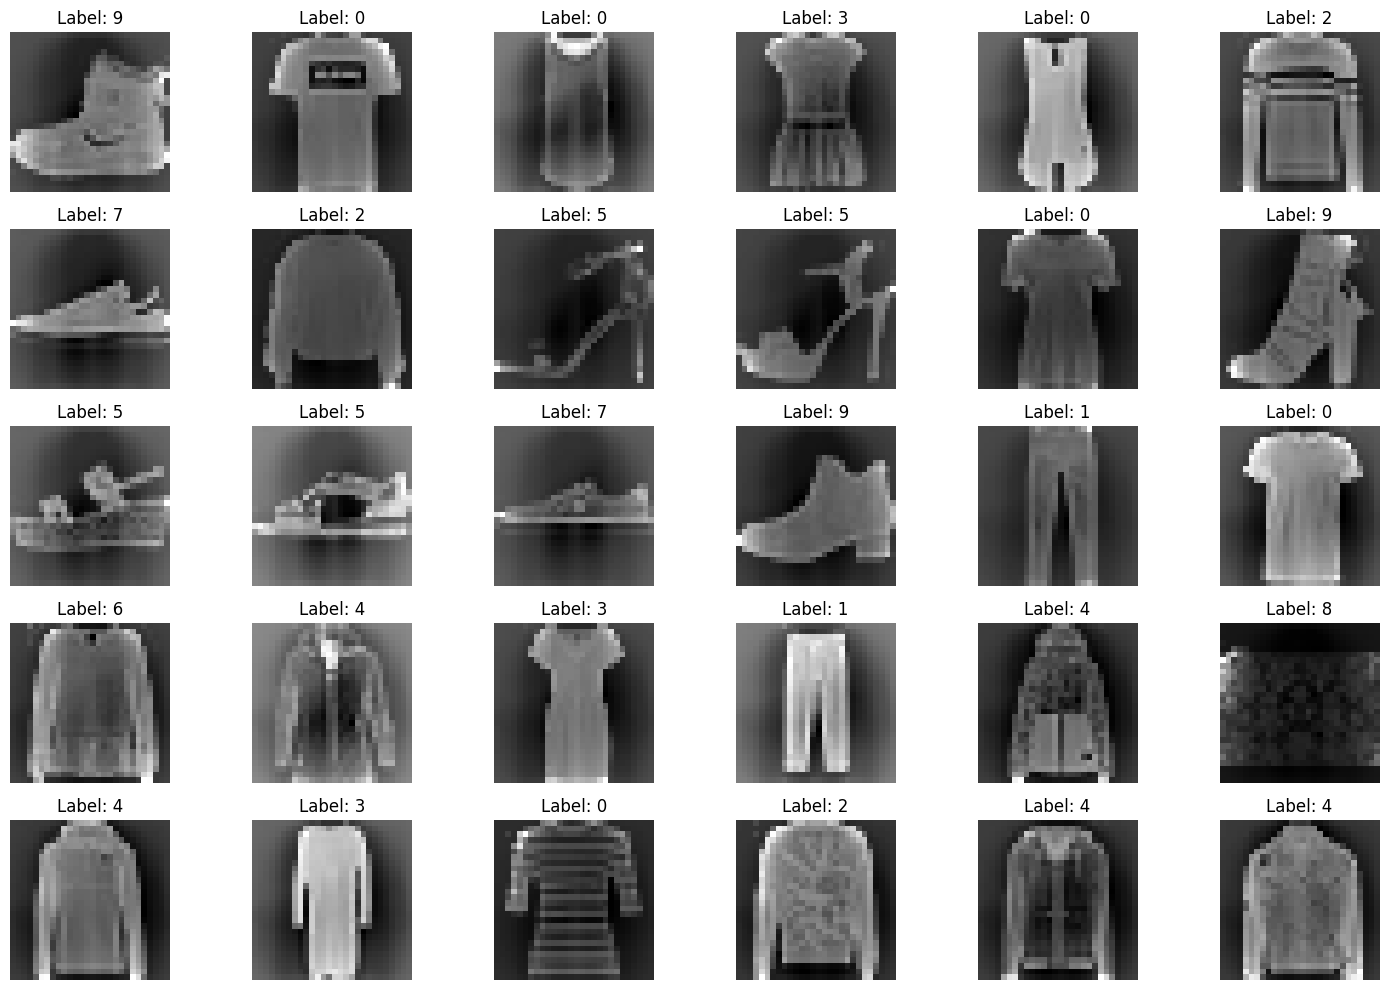

In [9]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 30

# Create a figure with multiple subplots
fig, axes = plt.subplots(5, 6, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the first 30 images and labels
for i in range(num_images):
    axes[i].imshow(X[i].reshape((28, 28)), cmap='gray')
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')  # Hide axes

# Display the plot
plt.tight_layout()
plt.show()


Even I did not understand what label 8 is.

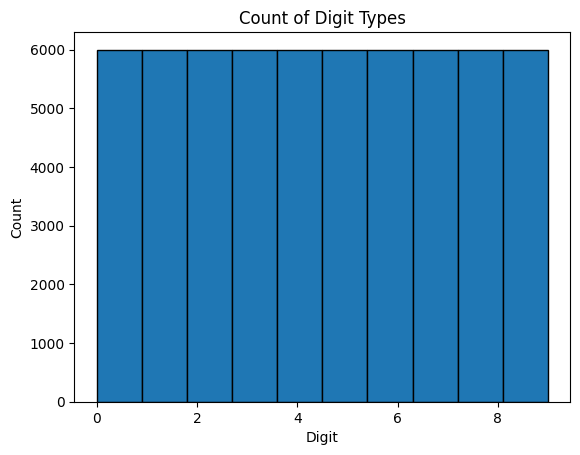

In [37]:
import matplotlib.pyplot as plt

plt.hist(y, bins=len(set(y)), edgecolor='black')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Count of Digit Types')
plt.show()


In [27]:
import plotly.express as px

# Assuming y is a list or a pandas Series
fig = px.histogram(y, x=y, title='Count of Digit Types')
fig.update_xaxes(title_text='Digit')
fig.update_yaxes(title_text='Count')
fig.show()


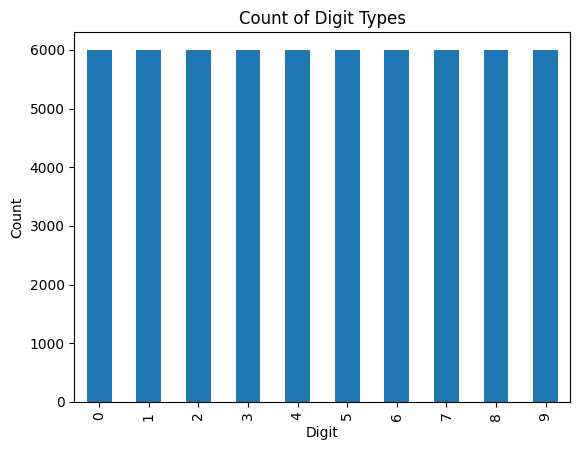

In [28]:
import pandas as pd

# Assuming y is a list or a pandas Series
y_series = pd.Series(y)
y_series.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Count of Digit Types')
plt.show()


Code 'sns.countplot(y)' took so long so I decided to check alternatives. The data set seems fairly balanced.  In other words, there are enough samples of each digit.  If not, we would have needed to re-balance the dataset.

## Predict Digit from Handwriting
Since **SVM** is a tool we already know, let's start with that.

In [ ]:
%%time

# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

While Support Vector Machines create a boundary that maximize the margin between the different classes, it takes a very long time.  Let's attempt a different way of solving this perhaps by mimicing the way we classify images in our brain...

### Neural Network

Neural Network libraries are efficient in solving for these weights and biases in large matrices... but they are not very explainable unless you define the layers in a meaningful manner.

In [10]:
%%time
from sklearn.svm import SVC
# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)

print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1166
           1       0.98      0.99      0.99      1213
           2       0.82      0.78      0.80      1232
           3       0.91      0.86      0.89      1209
           4       0.79      0.84      0.81      1159
           5       0.96      0.95      0.96      1217
           6       0.71      0.71      0.71      1178
           7       0.93      0.96      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

CPU times: user 4min 31s, sys: 1min 49s, total: 6min 21s
Wall time: 4min


Notice the Neural Network took a lot less time to get a more accurate result.  Now, let's see how this performs on data it has never seen before...

In [11]:
# Load Data for
import pandas as pd
from sklearn.preprocessing import scale
X_score = scale(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/fashion/mnist_fashion_test.csv'))

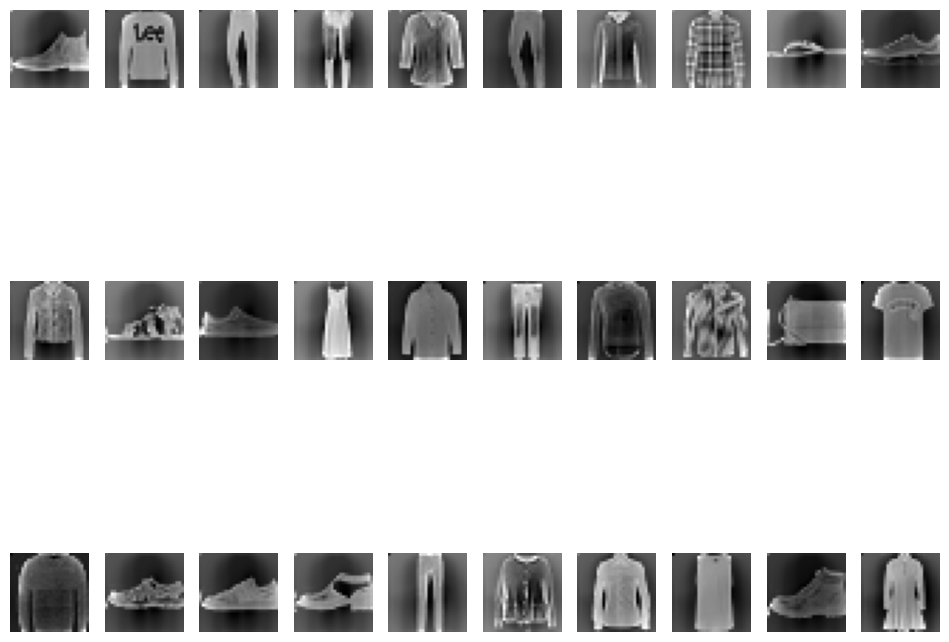

In [13]:
import matplotlib.pyplot as plt

# Assuming X_score is a NumPy array or can be converted to one
# If there's an extra value, correct it by taking only the first 784 values
if X_score.shape[1] == 785:
    X_score = X_score[:, :784]  # Remove the last column

# View the first 30 handwritten images
plt.figure(figsize=(12, 10))
col, row = 10, 3  # 10 columns and 3 rows for 30 images

for i in range(col * row):
    plt.subplot(row, col, i + 1)
    plt.imshow(X_score[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

plt.show()


In [16]:
# Show predicted digits
print('Predicted Digits (Neural Network):')
for i in range(col*row):
    if np.mod(i,col) == 0:
        print('\n')
    print(mdlNncDgt.predict(X_score)[i], end=' ')

Predicted Digits (Neural Network):


7 2 1 1 6 1 4 6 5 7 

4 5 7 3 6 3 0 6 8 0 

8 7 7 5 1 6 6 6 9 4 

Let's see if this result can be further improved by tweaking the network...

utexas_ds_orie_divider_gray.png

### Deep Neural Network

Adding additional hidden layers in between the input and output layers could improve the solution.  Such models are known as **Deep Neural Network** models.

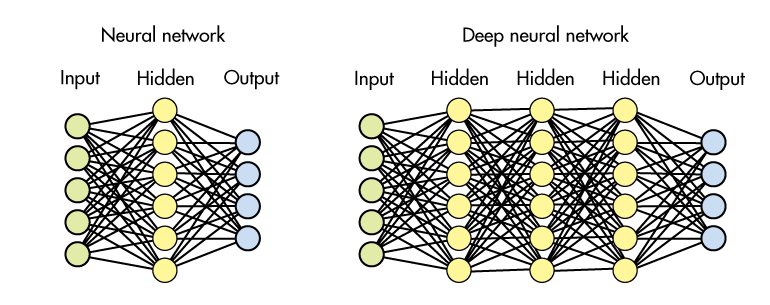

In [17]:
%%time

# Build Deep Neural Network - Additional Hidden Layers
from sklearn.neural_network import MLPClassifier
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1166
           1       0.98      0.98      0.98      1213
           2       0.81      0.80      0.81      1232
           3       0.90      0.88      0.89      1209
           4       0.81      0.84      0.82      1159
           5       0.96      0.96      0.96      1217
           6       0.75      0.69      0.72      1178
           7       0.94      0.94      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.94      0.95      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

CPU times: user 2min 32s, sys: 1min 1s, total: 3min 34s
Wall time: 2min 8s


### Cross Validation

In [18]:
# Cross-validate model across 5 different experiments
from sklearn.model_selection import cross_val_score
cross_val_score(mdlDncDgt, X, y, cv=5)

array([0.88791667, 0.883     , 0.88775   , 0.89066667, 0.88333333])